In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import collections
import re, string
import sys
import time
import json
from nltk.corpus import stopwords
from subprocess import check_output
%matplotlib inline

In [2]:


def init_ds(json):
    ds = {}
    keys = json.keys()
    for k in keys:
        ds[k] = []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file, encoding = "utf8") as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count == 0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
        return pd.DataFrame(dataset)

In [3]:
%%time
yelp_business = read_json(r'C:/Users/adity/Downloads/CS396 - Data Science Pipeline/Yelp_Dataset/business.json')

Wall time: 8.62 s


In [4]:
yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [5]:
yelp_review = read_json(r'C:/Users/adity/Downloads/CS396 - Data Science Pipeline/Yelp_Dataset/review.json')

In [6]:
yelp_review.business_id.value_counts()

4JNXUYY8wbaaDmk3BPzlWw    8570
RESDUcs7fIiihp38-d6_6g    8568
K7lWdNUhCbcnEvI0NhGewg    6887
f4x1YBxkLrZg652xt2KR5g    5847
cYwJA2A6I12KNkm2rtXd5g    5575
DkYS3arLOhA8si5uUEmHOw    5206
2weQS-RnoOBhb1KsHKyoSQ    4534
5LNZ67Yw9RD6nf4_UhXOjw    4522
iCQpiavjjPzJ5_3gPD5Ebg    4351
SMPbvZLSMMb7KU76YNYMGg    4350
ujHiaprwCQ5ewziu0Vi9rw    4318
AV6weBrZFFBfRGCbcRGO4g    4240
KskYqH1Bi7Z_61pH6Om8pg    4131
El4FC8jcawUVgw_0EIcbaQ    4093
rcaPajgKOJC2vo_l3xa42A    4014
eoHdUeQDNgQ6WYEnP2aiRw    4006
FaHADZARwnY4yvlvpnsfGA    3710
faPVqws-x-5k2CQKDNtHxw    3662
OETh78qcgDltvHULowwhJg    3642
Wxxvi3LZbHNIDwJ-ZimtnA    3579
u_vPjx925UPEG9DFOAAvFQ    3575
hihud--QRriCYZw1zZvW4g    3554
7sPNbCx7vGAaH7SbNPZ6oA    3494
g8OnV26ywJlZpezdBnOWUQ    3366
3kdSl5mo9dWC4clrQjEDGg    3350
XZbuPXdyA0ZtTu3AzqtQhg    3339
XXW_OFaYQkkGOGniujZFHg    3330
YJ8ljUhLsz6CtT_2ORNFmg    3305
na4Th5DrNauOv-c43QQFvA    3301
HhVmDybpU7L50Kb5A0jXTg    3284
                          ... 
h3KyMjr-KiAYQ9dTFd7eAQ       3
xOctL53T

In [7]:
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [8]:
bottom_reviewed = yelp_review[yelp_review["stars"] < 2]
bottom_reviews_dict = {} 

for business_id in bottom_reviewed["business_id"].values:
    try:
        bottom_reviews_dict[business_id] = bottom_reviews_dict[business_id] + 1
    except:
        bottom_reviews_dict[business_id] = 1
        
bottombusiness = pd.DataFrame.from_dict(data = bottom_reviews_dict, orient = "index")
bottombusiness.reset_index(inplace = True)
bottombusiness.columns = ['business_id', 'rated']

In [9]:
right = pd.DataFrame(yelp_business[['business_id', "name", "categories"]].values, columns = ['business_id', "Business name", "categories"])
bottom_business_data = pd.merge(bottombusiness, right = right, how = "inner", on = 'business_id')

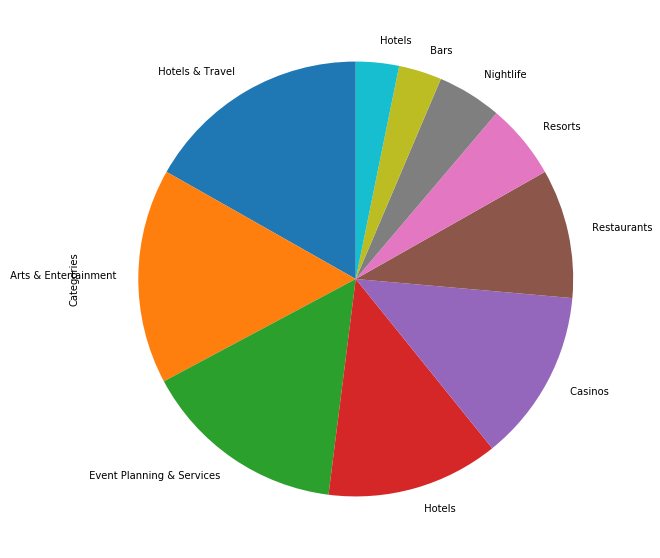

In [10]:
num_cat = 10
bottom_business = 30 #choose categories of top 30 businesses
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]
Categories = {}

for cat in cat_data.categories.values:
    all_categories = cat.split(",")
    for x in all_categories:
        try:
            Categories[x] = Categories[x] + 1
        except:
            Categories[x] = 1
bottom_categories = pd.DataFrame.from_dict(data = Categories, orient = "index")
bottom_categories.reset_index(inplace = True)
bottom_categories.columns = ['category', 'occurance']

x_val = bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels = bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values

series = pd.Series(x_val, index = labels, name = 'Categories')
series.plot.pie(figsize = (10, 10), startangle = 90)

In [11]:
close_busi_df = pd.DataFrame(yelp_business[yelp_business['is_open'] == 0][['business_id', "review_count", "stars"]].values, columns = ['business_id', "Reviews_no", "stars"])

In [12]:
open_busi_df = pd.DataFrame(yelp_business[yelp_business['is_open'] == 1][['business_id', "review_count", "stars"]].values, columns = ['business_id', "Reviews_no", "stars"])

In [13]:
open_busi_df.head()

,business_id,Reviews_no,stars
0,QXAEGFB4oINsVuTFxEYKFQ,128,2.5
1,gnKjwL_1w79qoiV3IC_xQQ,170,4
2,xvX2CttrVhyG2z1dFg_0xw,3,5
3,HhyxOkGAM07SRYtlQ4wMFQ,4,4
4,68dUKd8_8liJ7in4aWOSEA,3,2.5


In [14]:
open_rev_df = pd.DataFrame(yelp_review[['business_id', "useful", "funny", "cool"]].values, columns = ['business_id', "useful", "funny", "cool"])

In [15]:
open_rev_data = open_rev_df.groupby(["business_id"])

In [16]:
test = open_rev_data.aggregate(np.sum)

In [17]:
test

,useful,funny,cool
business_id,,,
--1UhMGODdWsrMastO9DZw,17,1,16
--6MefnULPED_I942VcFNA,61,30,35
--7zmmkVg-IMGaXbuVd0SQ,86,30,65
--8LPVSo5i0Oo61X01sV9A,11,0,0
--9QQLMTbFzLJ_oT-ON3Xw,8,3,4
--9e1ONYQuAa-CB_Rrw7Tw,1770,917,1183
--DaPTJW3-tB1vP-PfdTEg,18,3,10
--DdmeR16TRb3LsjG0ejrQ,18,15,14
--EF5N7P70J_UYBTPypYlA,8,2,4


In [18]:
open_business = pd.merge(open_busi_df, right = test, how = "inner", on = 'business_id')

In [19]:
open_business['stars'] = open_business['stars'].astype(float)
open_business['Reviews_no'] = open_business['Reviews_no'].astype(float)
print(1)
open_bus_conc = open_business.mean()
print(2)
open_bus_conc

1
2


Reviews_no    35.496152
stars          3.609770
useful        48.788263
funny         17.017121
cool          20.782825
dtype: float64

In [20]:
close_business = pd.merge(close_busi_df, right = test, how = "inner", on = 'business_id')

In [21]:
close_business['stars'] = close_business['stars'].astype(float)
close_business['Reviews_no'] = close_business['Reviews_no'].astype(float)

In [22]:
close_bus_conc = close_business.mean()
close_bus_conc

Reviews_no    24.438358
stars          3.473257
useful        38.715849
funny         15.553984
cool          16.872110
dtype: float64

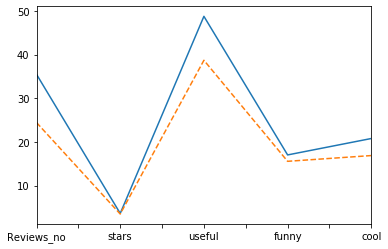

<Figure size 1440x1224 with 0 Axes>

In [23]:
fig, ax = plt.subplots()
plt.figure(figsize = (20,17))
ax = open_bus_conc.plot(y = ["Reviews_no", "stars", "useful", "funny", "cool"], ax = ax)
close_bus_conc.plot(y = ["Reviews_no", "stars", "useful", "funny", "cool"], ax = ax, ls = "--")
plt.show()

In [24]:
busi_ml = pd.DataFrame(yelp_business[['business_id', "review_count", "stars", "is_open"]].values, columns = ['business_id', "Reviews_no", "stars", "Open status"])

In [25]:
busi_ml.head()

,business_id,Reviews_no,stars,Open status
0,1SWheh84yJXfytovILXOAQ,5,3,0
1,QXAEGFB4oINsVuTFxEYKFQ,128,2.5,1
2,gnKjwL_1w79qoiV3IC_xQQ,170,4,1
3,xvX2CttrVhyG2z1dFg_0xw,3,5,1
4,HhyxOkGAM07SRYtlQ4wMFQ,4,4,1


In [26]:
business_set = pd.merge(busi_ml, right = test, how = "inner", on = 'business_id')

In [27]:
business_set['stars'] = business_set['stars'].astype(float)
business_set['Reviews_no'] = business_set['Reviews_no'].astype(float)
business_set['Open status'] = business_set['Open status'].astype(float)

In [28]:
business_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192606 entries, 0 to 192605
Data columns (total 7 columns):
business_id    192606 non-null object
Reviews_no     192606 non-null float64
stars          192606 non-null float64
Open status    192606 non-null float64
useful         192606 non-null int64
funny          192606 non-null int64
cool           192606 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.8+ MB


In [29]:
business_set = business_set.dropna(subset = ['business_id', "Reviews_no", "stars", "useful", "funny", "cool"])

In [30]:
business_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192606 entries, 0 to 192605
Data columns (total 7 columns):
business_id    192606 non-null object
Reviews_no     192606 non-null float64
stars          192606 non-null float64
Open status    192606 non-null float64
useful         192606 non-null int64
funny          192606 non-null int64
cool           192606 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.8+ MB


In [43]:
X = business_set[["Reviews_no", "stars", "useful", "funny", "cool"]]
y = business_set['Open status']

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression().fit(X, y)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
CV_class_score = cross_val_score(LogisticRegression(max_iter = 500), X, y, cv = 5, scoring = 'accuracy')

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [34]:
CV_class_score

array([0.82290639, 0.82254296, 0.82297967, 0.82282391, 0.82294912])

In [35]:
print("Accuracy with a Logistic Regression classifier")
print(CV_class_score.mean())

Accuracy with a Logistic Regression classifier
0.8228404117222488


In [36]:
from sklearn.naive_bayes import GaussianNB
gaus_model = GaussianNB().fit(X, y)

In [37]:
cv_gaus_score = cross_val_score(GaussianNB(), X, y, cv = 5,scoring = 'accuracy')

In [38]:
cv_gaus_score

array([0.50443902, 0.81914231, 0.82077308, 0.82129228, 0.82037902])

In [39]:
print("Accuracy with a Gaussian Naive Bayes classifier")
print(cv_gaus_score.mean())

Accuracy with a Gaussian Naive Bayes classifier
0.7572051441950818


In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [pow(10, -1*i) for i in range(0, 3)], 'max_depth':[3, 4]}
gbt_business = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'accuracy')
gbt_business.fit(X, y)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [47]:
gbt_business.cv_results_

{'mean_fit_time': array([18.09853641, 23.32213863, 18.00089614, 24.30876573, 19.50924897,
        25.78313462]),
 'std_fit_time': array([1.06656635, 0.43151267, 0.11419662, 0.13715511, 0.24428608,
        0.0973165 ]),
 'mean_score_time': array([0.2709736 , 0.29290644, 0.30832148, 0.35190701, 0.35629296,
        0.46751976]),
 'std_score_time': array([0.02005225, 0.01318041, 0.00241431, 0.01133114, 0.02004917,
        0.00205771]),
 'param_learning_rate': masked_array(data=[1, 1, 0.1, 0.1, 0.01, 0.01],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4, 3, 4, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 1, 'max_depth': 3},
  {'learning_rate': 1, 'max_depth': 4},
  {'learning_rate': 0.1, 'max_depth': 3},
  {'learning_rate': 0.1, 'max_depth': 4},
  {'learning_rate': 0.01, 'max

In [48]:
print("Accuracy with Gradient Boosting tree classifier: ")
max(gbt_business.cv_results_['mean_test_score'])

Accuracy with Gradient Boosting tree classifier: 


0.8230377039136891

In [49]:
parameters = {'learning_rate': [pow(10, -1*i) for i in range(0, 3)], 'max_depth':[3,4]}
gbt_business_roc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'roc_auc')
gbt_business_roc.fit(X, y)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [50]:
gbt_business_roc.cv_results_

{'mean_fit_time': array([15.76291855, 22.48321605, 17.95235221, 23.21378493, 19.11377708,
        26.89315788]),
 'std_fit_time': array([0.22788921, 0.84635845, 0.33126384, 0.48895147, 0.16874082,
        1.74864156]),
 'mean_score_time': array([0.33946196, 0.3323524 , 0.34748149, 0.38919743, 0.44173249,
        0.53690163]),
 'std_score_time': array([0.06778794, 0.00781902, 0.02698248, 0.01966016, 0.05058556,
        0.08898601]),
 'param_learning_rate': masked_array(data=[1, 1, 0.1, 0.1, 0.01, 0.01],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4, 3, 4, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 1, 'max_depth': 3},
  {'learning_rate': 1, 'max_depth': 4},
  {'learning_rate': 0.1, 'max_depth': 3},
  {'learning_rate': 0.1, 'max_depth': 4},
  {'learning_rate': 0.01, 'max

In [51]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors =5 ).fit(X, y)

In [52]:
CV_K_score = cross_val_score(KNeighborsClassifier(n_neighbors = 5), X, y, cv = 5,scoring = 'accuracy')

In [53]:
CV_K_score

array([0.79455895, 0.78949691, 0.79631889, 0.79504686, 0.79244548])

In [54]:
print("Accuracy with K Nearest Neighbors Classifier")
print(CV_K_score.mean())

Accuracy with K Nearest Neighbors Classifier
0.7935734191200575


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
dtree_model = DecisionTreeClassifier(random_state = 0, max_depth = 5).fit(X, y)
CV_dtree_score = cross_val_score(DecisionTreeClassifier(random_state = 0, max_depth = 5), X, y, cv = 5, scoring = 'accuracy')

In [57]:
CV_dtree_score

array([0.82303619, 0.82301023, 0.82300563, 0.82303159, 0.82305296])

In [58]:
print("Accuracy with Decision Tree Classifier")
print(CV_dtree_score.mean())

Accuracy with Decision Tree Classifier
0.8230273201970068


In [59]:
rforest_model = RandomForestClassifier(max_depth = 5, n_estimators = 10).fit(X, y)
CV_rforest_score = cross_val_score(RandomForestClassifier(random_state = 0, max_depth = 3, max_features = 1), X, y, cv = 5, scoring = 'accuracy')

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [60]:
CV_rforest_score

array([0.82303619, 0.82303619, 0.82303159, 0.82303159, 0.82305296])

In [61]:
print("Accuracy with Decision Tree Classifier")
print(CV_dtree_score.mean())

Accuracy with Decision Tree Classifier
0.8230273201970068


In [62]:
import warnings;
warnings.filterwarnings('ignore')

In [63]:
from sklearn.svm import LinearSVC
lin_svm_model = LinearSVC(random_state = 0, tol = 1e-5, max_iter = 1000).fit(X, y)
CV_lin_svm_score = cross_val_score(LinearSVC(random_state = 0, tol = 1e-5, max_iter = 1000), X, y, cv = 5,scoring = 'accuracy')

In [64]:
print("Accuracy with Linear SVM Classifier")
print(CV_lin_svm_score.mean())

Accuracy with Linear SVM Classifier
0.7680859362489804


In [65]:
from sklearn import linear_model

In [66]:
sgd_class_model_1 = linear_model.SGDClassifier(max_iter = 1500, tol = 1e-3, penalty = 'l2').fit(X, y)
CV_sgd_class_score_1 = cross_val_score(linear_model.SGDClassifier(max_iter = 1500, tol = 1e-3, penalty = 'l2'), X, y, cv = 5, scoring = 'accuracy')
CV_sgd_class_score_1

array([0.81942786, 0.75245314, 0.7747722 , 0.822123  , 0.57227414])

In [68]:
print("Accuracy with SGD trained Classifier")
print(CV_sgd_class_score_1.mean())

Accuracy with SGD trained Classifier
0.7482100692772267


In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
mlp_model = MLPClassifier(solver = 'sgd', alpha = 1e-4, hidden_layer_sizes = (5, 3), random_state = 1).fit(X, y)
CV_mlp_model_score = cross_val_score(MLPClassifier(solver = 'sgd', alpha = 1e-4, hidden_layer_sizes = (5, 3), random_state = 1), X, y, cv = 5, scoring = 'accuracy')
CV_mlp_model_score

array([0.82303619, 0.82303619, 0.82303159, 0.82297967, 0.82305296])

In [71]:
print("Accuracy with a Multi Layer perceptron Classifier")
print(CV_mlp_model_score.mean())

Accuracy with a Multi Layer perceptron Classifier
0.8230273200622273


In [72]:
mlp_model_1 = MLPClassifier(solver = 'adam', alpha = 1e-4, hidden_layer_sizes = (5,5), random_state = 1).fit(X, y)
CV_mlp_model_score_1 = cross_val_score(MLPClassifier(solver = 'adam', alpha = 1e-4, hidden_layer_sizes = (5, 5), random_state = 1), X, y, cv = 5, scoring = 'accuracy')
CV_mlp_model_score_1

array([0.82303619, 0.82280255, 0.82303159, 0.82303159, 0.823027  ])